CS6220 Data Mining
Team Name: Bur Oak
Group Member: Jiayue Zhang, Nianlong Lin, Surya Mani

In [3]:
# import required libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore', category=pd.errors.DtypeWarning)

# Read raw data, skipping the first row temporarily
df_raw = pd.read_csv('merged_file.csv', header=None)

# display the first few rows to check the data
df_raw.head()

,0,1,2,3,4,5,6,7,8,9,...,12929,12930,12931,12932,12933,12934,12935,12936,12937,12938
0,Unnamed: 0,AAPL US Equity,AAPL US Equity.1,AAPL US Equity.2,AAPL US Equity.3,AAPL US Equity.4,NVDA US Equity,NVDA US Equity.1,NVDA US Equity.2,NVDA US Equity.3,...,SKIN US Equity,SKIN US Equity.1,SKIN US Equity.2,SKIN US Equity.3,SKIN US Equity.4,MGNX US Equity,MGNX US Equity.1,MGNX US Equity.2,MGNX US Equity.3,MGNX US Equity.4
1,NaN,High,Low,Open,Last_Price,Volume,High,Low,Open,Last_Price,...,High,Low,Open,Last_Price,Volume,High,Low,Open,Last_Price,Volume
2,2/1/2010,7,6.832,6.87,6.955,749873684,0.415,0.383,0.3863,0.4143,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2/2/2010,7.011,6.906,6.997,6.995,698341252,0.4238,0.4115,0.4128,0.4185,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2/3/2010,7.15,6.944,6.97,7.115,615327076,0.4238,0.4128,0.4148,0.422,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Extract the stock tickers from the first row
# We'll skip the first column which appears to be empty/NaN
header_row = df_raw.iloc[0, 1:].tolist()
header_row[:10]

['AAPL US Equity',
 'AAPL US Equity.1',
 'AAPL US Equity.2',
 'AAPL US Equity.3',
 'AAPL US Equity.4',
 'NVDA US Equity',
 'NVDA US Equity.1',
 'NVDA US Equity.2',
 'NVDA US Equity.3',
 'NVDA US Equity.4']

In [5]:
# Extract unique stock names (removing the .1, .2 suffixes)
stock_names = []
for col in header_row:
    if isinstance(col, str) and ' US Equity' in col:
        base_name = col.split(' ')[0]
        if base_name not in stock_names:
            stock_names.append(base_name)
    else:
        print(col)

Unnamed: 0
Unnamed: 0
Unnamed: 0


In [6]:
# display some stock names for verification
stock_names[:10]

['AAPL',
 'NVDA',
 'MSFT',
 'AMZN',
 'META',
 'GOOGL',
 'AVGO',
 'TSLA',
 'GOOG',
 'JPM']

In [7]:
# create the price types for the second level
price_types = ['High', 'Low', 'Open', 'Last_Price', 'Volume']

# create a list of tuples
tuples = []
for stock in stock_names:
    for price_type in price_types:
        tuples.append((stock, price_type))
# display some tuples
tuples[:10]

[('AAPL', 'High'),
 ('AAPL', 'Low'),
 ('AAPL', 'Open'),
 ('AAPL', 'Last_Price'),
 ('AAPL', 'Volume'),
 ('NVDA', 'High'),
 ('NVDA', 'Low'),
 ('NVDA', 'Open'),
 ('NVDA', 'Last_Price'),
 ('NVDA', 'Volume')]

In [8]:
# Create the MultiIndex from the list of tuples
multi_cols = pd.MultiIndex.from_tuples(tuples, names=['Stock', 'Metric'])

In [9]:
# display to verify it has been created correctly
multi_cols

MultiIndex([('AAPL',       'High'),
            ('AAPL',        'Low'),
            ('AAPL',       'Open'),
            ('AAPL', 'Last_Price'),
            ('AAPL',     'Volume'),
            ('NVDA',       'High'),
            ('NVDA',        'Low'),
            ('NVDA',       'Open'),
            ('NVDA', 'Last_Price'),
            ('NVDA',     'Volume'),
            ...
            ('SKIN',       'High'),
            ('SKIN',        'Low'),
            ('SKIN',       'Open'),
            ('SKIN', 'Last_Price'),
            ('SKIN',     'Volume'),
            ('MGNX',       'High'),
            ('MGNX',        'Low'),
            ('MGNX',       'Open'),
            ('MGNX', 'Last_Price'),
            ('MGNX',     'Volume')],
           names=['Stock', 'Metric'], length=12935)

In [10]:
# read the CSV file with the first two rows as headers
df = pd.read_csv('merged_file.csv', header=[0, 1])
# select the first column which contains the data
date_column = df.iloc[:, 0]

In [11]:
date_column.head()

0    2/1/2010
1    2/2/2010
2    2/3/2010
3    2/4/2010
4    2/5/2010
Name: (Unnamed: 0, Unnamed: 0_level_1), dtype: object

In [12]:
# remove any columns with 'unnamed'(empty columns or those without proper headers)
df = df.drop(columns=[col for col in df.columns if 'Unnamed' in str(col)][:])

In [13]:
df.head()

,AAPL US Equity,AAPL US Equity.1,AAPL US Equity.2,AAPL US Equity.3,AAPL US Equity.4,NVDA US Equity,NVDA US Equity.1,NVDA US Equity.2,NVDA US Equity.3,NVDA US Equity.4,...,SKIN US Equity,SKIN US Equity.1,SKIN US Equity.2,SKIN US Equity.3,SKIN US Equity.4,MGNX US Equity,MGNX US Equity.1,MGNX US Equity.2,MGNX US Equity.3,MGNX US Equity.4
,High,Low,Open,Last_Price,Volume,High,Low,Open,Last_Price,Volume,...,High,Low,Open,Last_Price,Volume,High,Low,Open,Last_Price,Volume
0,7.000,6.832,6.870,6.955,749873684.0,0.4150,0.3830,0.3863,0.4143,949829720.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7.011,6.906,6.997,6.995,698341252.0,0.4238,0.4115,0.4128,0.4185,849812040.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7.150,6.944,6.970,7.115,615327076.0,0.4238,0.4128,0.4148,0.4220,562298720.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7.085,6.842,7.026,6.859,757651048.0,0.4183,0.3930,0.4183,0.3975,783477240.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7.000,6.816,6.879,6.981,850305400.0,0.4065,0.3900,0.3970,0.4055,604852880.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df.columns = multi_cols

In [15]:
# Test various operations on the dataframe

# Access the 'High' column for 'AAPL'
aapl_high = df[('AAPL', 'High')]

# Access the 'Volume' column for 'NVDA'
nvda_volume = df[('NVDA', 'Volume')]

# Access multiple columns
aapl_high_low = df.loc[:, ('AAPL', ['High', 'Low'])]

# Access all 'High' columns for all stocks
all_highs = df.xs('High', level='Metric', axis=1)

# Access all columns for a specific stock, e.g., 'AAPL'
aapl_all = df['AAPL']

0         7.000
1         7.011
2         7.150
3         7.085
4         7.000
         ...   
3772    232.150
3773    240.190
3774    239.855
3775    240.790
3776    247.190
Name: (AAPL, High), Length: 3777, dtype: float64
Average NVDA Volume: 495150989.8810596


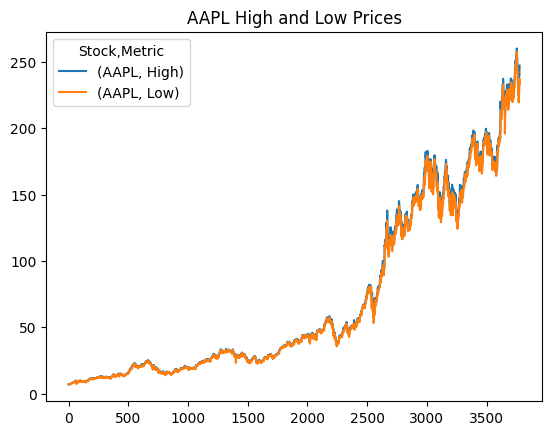

In [16]:
# Print the 'High' prices for 'AAPL'
print(aapl_high)

# Calculate the average volume for 'NVDA'
average_nvda_volume = nvda_volume.mean()
print(f"Average NVDA Volume: {average_nvda_volume}")

# Plot 'High' and 'Low' prices for 'AAPL'
import matplotlib.pyplot as plt
aapl_high_low.plot(title='AAPL High and Low Prices')
plt.show()

In [17]:
# show some basic information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3777 entries, 0 to 3776
Columns: 12935 entries, ('AAPL', 'High') to ('MGNX', 'Volume')
dtypes: float64(12935)
memory usage: 372.7 MB


In [18]:
# show the number of rows and columns
df.shape

(3777, 12935)

In [19]:
# dosplay the first few rows of the dataframe
df.columns

MultiIndex([('AAPL',       'High'),
            ('AAPL',        'Low'),
            ('AAPL',       'Open'),
            ('AAPL', 'Last_Price'),
            ('AAPL',     'Volume'),
            ('NVDA',       'High'),
            ('NVDA',        'Low'),
            ('NVDA',       'Open'),
            ('NVDA', 'Last_Price'),
            ('NVDA',     'Volume'),
            ...
            ('SKIN',       'High'),
            ('SKIN',        'Low'),
            ('SKIN',       'Open'),
            ('SKIN', 'Last_Price'),
            ('SKIN',     'Volume'),
            ('MGNX',       'High'),
            ('MGNX',        'Low'),
            ('MGNX',       'Open'),
            ('MGNX', 'Last_Price'),
            ('MGNX',     'Volume')],
           names=['Stock', 'Metric'], length=12935)

In [20]:
df.head()

Stock    AAPL                                          NVDA                  \
Metric   High    Low   Open Last_Price       Volume    High     Low    Open   
0       7.000  6.832  6.870      6.955  749873684.0  0.4150  0.3830  0.3863   
1       7.011  6.906  6.997      6.995  698341252.0  0.4238  0.4115  0.4128   
2       7.150  6.944  6.970      7.115  615327076.0  0.4238  0.4128  0.4148   
3       7.085  6.842  7.026      6.859  757651048.0  0.4183  0.3930  0.4183   
4       7.000  6.816  6.879      6.981  850305400.0  0.4065  0.3900  0.3970   

Stock                           ... SKIN                            MGNX      \
Metric Last_Price       Volume  ... High Low Open Last_Price Volume High Low   
0          0.4143  949829720.0  ...  NaN NaN  NaN        NaN    NaN  NaN NaN   
1          0.4185  849812040.0  ...  NaN NaN  NaN        NaN    NaN  NaN NaN   
2          0.4220  562298720.0  ...  NaN NaN  NaN        NaN    NaN  NaN NaN   
3          0.3975  783477240.0  ...  NaN NaN  NaN        NaN    NaN  NaN NaN   
4          0.4055  604852880.0  ...  NaN NaN  NaN        NaN    NaN  NaN NaN   

Stock                          
Metric Open Last_Price Volume  
0       NaN        NaN    NaN  
1       NaN        NaN    NaN  
2       NaN        NaN    NaN  
3       NaN        NaN    NaN  
4       NaN        NaN    NaN  

[5 rows x 12935 columns]

In [21]:
# retrieves the first level of the multiIndex, which is the list of stock symbols
df.columns.levels[0]

Index(['A', 'AA', 'AAL', 'AAMI', 'AAOI', 'AAON', 'AAP', 'AAPL', 'AAT', 'ABBV',
       ...
       'ZIP', 'ZM', 'ZS', 'ZTS', 'ZUMZ', 'ZUO', 'ZVRA', 'ZWS', 'ZYME', 'ZYXI'],
      dtype='object', name='Stock', length=2587)

In [22]:
# display the index of the dataframe, which represents the row labels
df.index

RangeIndex(start=0, stop=3777, step=1)

In [23]:
df.head()

Stock    AAPL                                          NVDA                  \
Metric   High    Low   Open Last_Price       Volume    High     Low    Open   
0       7.000  6.832  6.870      6.955  749873684.0  0.4150  0.3830  0.3863   
1       7.011  6.906  6.997      6.995  698341252.0  0.4238  0.4115  0.4128   
2       7.150  6.944  6.970      7.115  615327076.0  0.4238  0.4128  0.4148   
3       7.085  6.842  7.026      6.859  757651048.0  0.4183  0.3930  0.4183   
4       7.000  6.816  6.879      6.981  850305400.0  0.4065  0.3900  0.3970   

Stock                           ... SKIN                            MGNX      \
Metric Last_Price       Volume  ... High Low Open Last_Price Volume High Low   
0          0.4143  949829720.0  ...  NaN NaN  NaN        NaN    NaN  NaN NaN   
1          0.4185  849812040.0  ...  NaN NaN  NaN        NaN    NaN  NaN NaN   
2          0.4220  562298720.0  ...  NaN NaN  NaN        NaN    NaN  NaN NaN   
3          0.3975  783477240.0  ...  NaN NaN  NaN        NaN    NaN  NaN NaN   
4          0.4055  604852880.0  ...  NaN NaN  NaN        NaN    NaN  NaN NaN   

Stock                          
Metric Open Last_Price Volume  
0       NaN        NaN    NaN  
1       NaN        NaN    NaN  
2       NaN        NaN    NaN  
3       NaN        NaN    NaN  
4       NaN        NaN    NaN  

[5 rows x 12935 columns]

In [24]:
df.columns.levels[0]

Index(['A', 'AA', 'AAL', 'AAMI', 'AAOI', 'AAON', 'AAP', 'AAPL', 'AAT', 'ABBV',
       ...
       'ZIP', 'ZM', 'ZS', 'ZTS', 'ZUMZ', 'ZUO', 'ZVRA', 'ZWS', 'ZYME', 'ZYXI'],
      dtype='object', name='Stock', length=2587)

In [25]:
# loop through each stock in the multiIndex to process its data
for stock in df.columns.levels[0]:
    # Select the columns for the current stock
    stock_data = df[stock]
    
    # Check if any column in this stock's data is entirely NaN
    if stock_data.isna().all().any():
        # Drop all columns for this stock
        print(stock)
        df.drop(columns=stock, level=0, inplace=True)

XTSLA


In [26]:
# reset the column
df.columns = pd.MultiIndex.from_tuples(df.columns)

In [27]:
# check if the length of the date column matches the number of rows in the dataframe
if len(date_column) == len(df): # set date as index
    df.index = date_column
    df.index.name = 'Date'
else:
    print("error: not equal")

In [28]:
# show the number of rows and columns in the dataframe
df.shape

(3777, 12930)

In [29]:
# display the column names
df.columns

MultiIndex([('AAPL',       'High'),
            ('AAPL',        'Low'),
            ('AAPL',       'Open'),
            ('AAPL', 'Last_Price'),
            ('AAPL',     'Volume'),
            ('NVDA',       'High'),
            ('NVDA',        'Low'),
            ('NVDA',       'Open'),
            ('NVDA', 'Last_Price'),
            ('NVDA',     'Volume'),
            ...
            ('SKIN',       'High'),
            ('SKIN',        'Low'),
            ('SKIN',       'Open'),
            ('SKIN', 'Last_Price'),
            ('SKIN',     'Volume'),
            ('MGNX',       'High'),
            ('MGNX',        'Low'),
            ('MGNX',       'Open'),
            ('MGNX', 'Last_Price'),
            ('MGNX',     'Volume')],
           length=12930)

In [30]:
# display some basic information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3777 entries, 2/1/2010 to 1/31/2025
Columns: 12930 entries, ('AAPL', 'High') to ('MGNX', 'Volume')
dtypes: float64(12930)
memory usage: 372.6+ MB


In [31]:
# make a copy of dataframe
df_clean = df.copy()

In [32]:
# get the list of stock names
new_levels = df.columns.levels[0]
# check if XTSLA is in the list of stock names
is_contain = 'XTSLA' in new_levels
print(is_contain)

False


In [34]:
# libraries for data ayalysis and machine learning
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.ensemble import IsolationForest
from statsmodels.tsa.seasonal import seasonal_decompose
from datetime import datetime

# function to remove companies with early missing data
def remove_companies_with_early_missing_data(df, cutoff_date='2017-01-01'):  # 2010 - 2024 -- delete stock not in exchange before 2017
    cutoff_idx = df.index.get_loc(cutoff_date) if cutoff_date in df.index else len(df)
    early_data = df.iloc[:cutoff_idx]
    
    stocks_to_remove = []
    # loop through each stock and check if more than 50% data is missing before the cutoff date
    for stock in df.columns.levels[0]:
        if early_data[stock].isna().mean().mean() > 0.5:  # if over 50% delete
            stocks_to_remove.append(stock)
    
    print(f"remove number of {len(stocks_to_remove)} stocks")
    return df.drop(columns=stocks_to_remove, level=0)

df = remove_companies_with_early_missing_data(df)

remove number of 630 stocks


In [35]:
# refresh the column to ensure the correct MultiIndex structure
df.columns = pd.MultiIndex.from_tuples(df.columns, names=['Stock', 'Metric'])

In [36]:
df.head()

Stock      AAPL                                          NVDA                  \
Metric     High    Low   Open Last_Price       Volume    High     Low    Open   
Date                                                                            
2/1/2010  7.000  6.832  6.870      6.955  749873684.0  0.4150  0.3830  0.3863   
2/2/2010  7.011  6.906  6.997      6.995  698341252.0  0.4238  0.4115  0.4128   
2/3/2010  7.150  6.944  6.970      7.115  615327076.0  0.4238  0.4128  0.4148   
2/4/2010  7.085  6.842  7.026      6.859  757651048.0  0.4183  0.3930  0.4183   
2/5/2010  7.000  6.816  6.879      6.981  850305400.0  0.4065  0.3900  0.3970   

Stock                             ... SSTI                            MGNX  \
Metric   Last_Price       Volume  ... High Low Open Last_Price Volume High   
Date                              ...                                        
2/1/2010     0.4143  949829720.0  ...  NaN NaN  NaN        NaN    NaN  NaN   
2/2/2010     0.4185  849812040.0  ...  NaN NaN  NaN        NaN    NaN  NaN   
2/3/2010     0.4220  562298720.0  ...  NaN NaN  NaN        NaN    NaN  NaN   
2/4/2010     0.3975  783477240.0  ...  NaN NaN  NaN        NaN    NaN  NaN   
2/5/2010     0.4055  604852880.0  ...  NaN NaN  NaN        NaN    NaN  NaN   

Stock                                
Metric   Low Open Last_Price Volume  
Date                                 
2/1/2010 NaN  NaN        NaN    NaN  
2/2/2010 NaN  NaN        NaN    NaN  
2/3/2010 NaN  NaN        NaN    NaN  
2/4/2010 NaN  NaN        NaN    NaN  
2/5/2010 NaN  NaN        NaN    NaN  

[5 rows x 9780 columns]

In [37]:
df.columns

MultiIndex([('AAPL',       'High'),
            ('AAPL',        'Low'),
            ('AAPL',       'Open'),
            ('AAPL', 'Last_Price'),
            ('AAPL',     'Volume'),
            ('NVDA',       'High'),
            ('NVDA',        'Low'),
            ('NVDA',       'Open'),
            ('NVDA', 'Last_Price'),
            ('NVDA',     'Volume'),
            ...
            ('SSTI',       'High'),
            ('SSTI',        'Low'),
            ('SSTI',       'Open'),
            ('SSTI', 'Last_Price'),
            ('SSTI',     'Volume'),
            ('MGNX',       'High'),
            ('MGNX',        'Low'),
            ('MGNX',       'Open'),
            ('MGNX', 'Last_Price'),
            ('MGNX',     'Volume')],
           names=['Stock', 'Metric'], length=9780)

In [38]:
# function to fill missing values in the dataframe
def fill_missing_values(df):
    # fill missing values by carrying forawrd data within each stock
    for stock in df.columns.levels[0]:
        df[stock] = df[stock].fillna(method='ffill')
    
    # fill missing values by using the avg of the same metric across all stocks
    for metric in df.columns.levels[1]:
        market_avg = df.xs(metric, level='Metric', axis=1).mean(axis=1)
        for stock in df.columns.levels[0]:
            mask = df[(stock, metric)].isna()
            df.loc[mask, (stock, metric)] = market_avg[mask]
    
    return df

df = fill_missing_values(df)

/var/folders/g6/9gr3fw497cz15kkm4z7mfc4c0000gn/T/ipykernel_86069/1990691244.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[stock] = df[stock].fillna(method='ffill')


In [39]:
df.head()

Stock      AAPL                                          NVDA                  \
Metric     High    Low   Open Last_Price       Volume    High     Low    Open   
Date                                                                            
2/1/2010  7.000  6.832  6.870      6.955  749873684.0  0.4150  0.3830  0.3863   
2/2/2010  7.011  6.906  6.997      6.995  698341252.0  0.4238  0.4115  0.4128   
2/3/2010  7.150  6.944  6.970      7.115  615327076.0  0.4238  0.4128  0.4148   
2/4/2010  7.085  6.842  7.026      6.859  757651048.0  0.4183  0.3930  0.4183   
2/5/2010  7.000  6.816  6.879      6.981  850305400.0  0.4065  0.3900  0.3970   

Stock                             ...       SSTI                        \
Metric   Last_Price       Volume  ...       High        Low       Open   
Date                              ...                                    
2/1/2010     0.4143  949829720.0  ...  30.144224  29.182321  29.567388   
2/2/2010     0.4185  849812040.0  ...  30.396986  29.357984  29.768911   
2/3/2010     0.4220  562298720.0  ...  30.277332  29.362090  29.873322   
2/4/2010     0.3975  783477240.0  ...  29.747523  28.533244  29.520283   
2/5/2010     0.4055  604852880.0  ...  29.243434  27.993005  28.781362   

Stock                                   MGNX                                   \
Metric   Last_Price        Volume       High        Low       Open Last_Price   
Date                                                                            
2/1/2010  29.855872  4.175622e+06  30.144224  29.182321  29.567388  29.855872   
2/2/2010  30.009648  4.087038e+06  30.396986  29.357984  29.768911  30.009648   
2/3/2010  29.763203  3.573767e+06  30.277332  29.362090  29.873322  29.763203   
2/4/2010  28.781864  4.698434e+06  29.747523  28.533244  29.520283  28.781864   
2/5/2010  28.888277  4.741575e+06  29.243434  27.993005  28.781362  28.888277   

Stock                   
Metric          Volume  
Date                    
2/1/2010  4.175622e+06  
2/2/2010  4.087038e+06  
2/3/2010  3.573767e+06  
2/4/2010  4.698434e+06  
2/5/2010  4.741575e+06  

[5 rows x 9780 columns]

In [40]:
# refresh the columns to ensure the correct structure
df.columns = pd.MultiIndex.from_tuples(df.columns, names=['Stock', 'Metric'])  # refresh columns 

In [41]:
# function to handle outliers using z-score method
def handle_outliers(df, n_sigma=3):
    # loop through each stock and specific metrics (high, low, open, last price)
    for stock in df.columns.levels[0]:
        for metric in ['High', 'Low', 'Open', 'Last_Price']:
            series = df[(stock, metric)]
            mean = series.mean()
            std = series.std()
            
            # identify outliers based on z-score
            outliers = (series - mean).abs() > n_sigma * std
            
            # set outlier values greater than upper bound to the upper bound
            upper_bound = mean + n_sigma * std
            # set outlier values less than lower bound to the lower bound
            lower_bound = mean - n_sigma * std
            
            df.loc[outliers & (series > upper_bound), (stock, metric)] = upper_bound
            df.loc[outliers & (series < lower_bound), (stock, metric)] = lower_bound
    
    return df

df = fill_missing_values(df)

/var/folders/g6/9gr3fw497cz15kkm4z7mfc4c0000gn/T/ipykernel_86069/1990691244.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[stock] = df[stock].fillna(method='ffill')


In [42]:
df.head()

Stock      AAPL                                          NVDA                  \
Metric     High    Low   Open Last_Price       Volume    High     Low    Open   
Date                                                                            
2/1/2010  7.000  6.832  6.870      6.955  749873684.0  0.4150  0.3830  0.3863   
2/2/2010  7.011  6.906  6.997      6.995  698341252.0  0.4238  0.4115  0.4128   
2/3/2010  7.150  6.944  6.970      7.115  615327076.0  0.4238  0.4128  0.4148   
2/4/2010  7.085  6.842  7.026      6.859  757651048.0  0.4183  0.3930  0.4183   
2/5/2010  7.000  6.816  6.879      6.981  850305400.0  0.4065  0.3900  0.3970   

Stock                             ...       SSTI                        \
Metric   Last_Price       Volume  ...       High        Low       Open   
Date                              ...                                    
2/1/2010     0.4143  949829720.0  ...  30.144224  29.182321  29.567388   
2/2/2010     0.4185  849812040.0  ...  30.396986  29.357984  29.768911   
2/3/2010     0.4220  562298720.0  ...  30.277332  29.362090  29.873322   
2/4/2010     0.3975  783477240.0  ...  29.747523  28.533244  29.520283   
2/5/2010     0.4055  604852880.0  ...  29.243434  27.993005  28.781362   

Stock                                   MGNX                                   \
Metric   Last_Price        Volume       High        Low       Open Last_Price   
Date                                                                            
2/1/2010  29.855872  4.175622e+06  30.144224  29.182321  29.567388  29.855872   
2/2/2010  30.009648  4.087038e+06  30.396986  29.357984  29.768911  30.009648   
2/3/2010  29.763203  3.573767e+06  30.277332  29.362090  29.873322  29.763203   
2/4/2010  28.781864  4.698434e+06  29.747523  28.533244  29.520283  28.781864   
2/5/2010  28.888277  4.741575e+06  29.243434  27.993005  28.781362  28.888277   

Stock                   
Metric          Volume  
Date                    
2/1/2010  4.175622e+06  
2/2/2010  4.087038e+06  
2/3/2010  3.573767e+06  
2/4/2010  4.698434e+06  
2/5/2010  4.741575e+06  

[5 rows x 9780 columns]

In [43]:
# refresh the columns to ensure the correct structure
df.columns = pd.MultiIndex.from_tuples(df.columns, names=['Stock', 'Metric'])

In [44]:
# function to standardize the stock price and volumn data
def normalize_data(df):
    normalized_df = df.copy()
    
    # loop through each stock and specific metrics
    for stock in df.columns.levels[0]:
        for metric in ['High', 'Low', 'Open', 'Last_Price']:
            scaler = MinMaxScaler()
            normalized_df[(stock, metric)] = scaler.fit_transform(df[(stock, metric)].values.reshape(-1, 1))
        
        #  nomalize the Volume seprately, since it is not part of previous metrics
        if ('Volume' in df.columns.levels[1]):
            scaler = MinMaxScaler()
            normalized_df[(stock, 'Volume')] = scaler.fit_transform(df[(stock, 'Volume')].values.reshape(-1, 1))
    
    return normalized_df

normalized_df = normalize_data(df)

In [45]:
# refresh the columns to ensure the correct structure
df.columns = pd.MultiIndex.from_tuples(df.columns, names=['Stock', 'Metric'])

In [46]:
# function to decompose time series data
# 252 is the average number of trading day per year
def decompose_time_series(df, period=252):
    # using dictionary to store the decomposition results
    decomposition_results = {}
    
    for stock in df.columns.levels[0]:
        price_series = df[(stock, 'Last_Price')].dropna()
        
        # check if there is enough data, at least 2 periods worth of data
        if len(price_series) > period * 2:
            try:
                # decompose the time series into trend, seasonal, and residual components
                result = seasonal_decompose(price_series, model='additive', period=period)
                decomposition_results[stock] = {
                    'trend': result.trend,
                    'seasonal': result.seasonal,
                    'residual': result.resid
                }
            except:
                print(f"can not serilize the stock data for {stock}")
    
    return decomposition_results

decomposition_results = decompose_time_series(df)

In [47]:
# compute the technical indicators

In [48]:
!pip install pandas_ta

  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218909 sha256=0964d5f34391566b766d7b47df2dab924b7d96668d8da2d702c345ad5a7a32ae
  Stored in directory: /Users/surya/Library/Caches/pip/wheels/7f/33/8b/50b245c5c65433cd8f5cb24ac15d97e5a3db2d41a8b6ae957d
Successfully built pandas_ta


In [49]:
# using pandas_ta library to access technical indicators functions
import pandas_ta as ta

In [50]:
df.head()

Stock      AAPL                                          NVDA                  \
Metric     High    Low   Open Last_Price       Volume    High     Low    Open   
Date                                                                            
2/1/2010  7.000  6.832  6.870      6.955  749873684.0  0.4150  0.3830  0.3863   
2/2/2010  7.011  6.906  6.997      6.995  698341252.0  0.4238  0.4115  0.4128   
2/3/2010  7.150  6.944  6.970      7.115  615327076.0  0.4238  0.4128  0.4148   
2/4/2010  7.085  6.842  7.026      6.859  757651048.0  0.4183  0.3930  0.4183   
2/5/2010  7.000  6.816  6.879      6.981  850305400.0  0.4065  0.3900  0.3970   

Stock                             ...       SSTI                        \
Metric   Last_Price       Volume  ...       High        Low       Open   
Date                              ...                                    
2/1/2010     0.4143  949829720.0  ...  30.144224  29.182321  29.567388   
2/2/2010     0.4185  849812040.0  ...  30.396986  29.357984  29.768911   
2/3/2010     0.4220  562298720.0  ...  30.277332  29.362090  29.873322   
2/4/2010     0.3975  783477240.0  ...  29.747523  28.533244  29.520283   
2/5/2010     0.4055  604852880.0  ...  29.243434  27.993005  28.781362   

Stock                                   MGNX                                   \
Metric   Last_Price        Volume       High        Low       Open Last_Price   
Date                                                                            
2/1/2010  29.855872  4.175622e+06  30.144224  29.182321  29.567388  29.855872   
2/2/2010  30.009648  4.087038e+06  30.396986  29.357984  29.768911  30.009648   
2/3/2010  29.763203  3.573767e+06  30.277332  29.362090  29.873322  29.763203   
2/4/2010  28.781864  4.698434e+06  29.747523  28.533244  29.520283  28.781864   
2/5/2010  28.888277  4.741575e+06  29.243434  27.993005  28.781362  28.888277   

Stock                   
Metric          Volume  
Date                    
2/1/2010  4.175622e+06  
2/2/2010  4.087038e+06  
2/3/2010  3.573767e+06  
2/4/2010  4.698434e+06  
2/5/2010  4.741575e+06  

[5 rows x 9780 columns]

In [51]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=pd.errors.PerformanceWarning)

In [52]:
# function to calculate technical indicators like SMA, MACD, RSI, and Bollinger bands
def calculate_technical_indicators(df):
    # create an empty dataframe to store tech indicators
    tech_indicators = pd.DataFrame(index=df.index)
    
    # loop through each stock to calculate indicators
    for stock in df.columns.levels[0]:
        high = df[(stock, 'High')].values
        low = df[(stock, 'Low')].values
        open_price = df[(stock, 'Open')].values
        close = df[(stock, 'Last_Price')].values
        volume = df[(stock, 'Volume')].values
        
        if np.isnan(close).any():
            continue
        
        # convert series into pandas Series with the correct index
        high_series = pd.Series(high, index=df.index)
        low_series = pd.Series(low, index=df.index)
        open_series = pd.Series(open_price, index=df.index)
        close_series = pd.Series(close, index=df.index)
        volume_series = pd.Series(volume, index=df.index)    
        
        # compute SMA
        tech_indicators[(stock, 'SMA_20')] = pd.Series(ta.sma(close_series, length=20), index=df.index)
        tech_indicators[(stock, 'SMA_50')] = pd.Series(ta.sma(close_series, length=50), index=df.index)
        tech_indicators[(stock, 'SMA_200')] = pd.Series(ta.sma(close_series, length=200), index=df.index)
        
        # compute MACD
        macd_result = ta.macd(close_series)
        tech_indicators[(stock, 'MACD')] = macd_result['MACD_12_26_9']
        tech_indicators[(stock, 'MACD_Signal')] = macd_result['MACDs_12_26_9']
        tech_indicators[(stock, 'MACD_Hist')] = macd_result['MACDh_12_26_9']
        
        # compute RSI
        tech_indicators[(stock, 'RSI_14')] = ta.rsi(close_series, length=14)
         
        # compute boll
        bbands = ta.bbands(close_series, length=20)
        tech_indicators[(stock, 'BB_Upper')] = bbands['BBU_20_2.0']
        tech_indicators[(stock, 'BB_Middle')] = bbands['BBM_20_2.0']
        tech_indicators[(stock, 'BB_Lower')] = bbands['BBL_20_2.0']
        
    return tech_indicators

# function to calculate stock returns
def calculate_returns(df, periods=[1, 5, 20, 60]):
    returns_df = pd.DataFrame(index=df.index)
    
    for stock in df.columns.levels[0]:
        price = df[(stock, 'Last_Price')]
        
        # compute daily returns 
        returns_df[(stock, 'Daily_Return')] = price.pct_change()
        
        # compute returns based on different period
        for period in periods:
            returns_df[(stock, f'Return_{period}d')] = price.pct_change(period)
    
    return returns_df

# function to calculate stock volatility
def calculate_volatility(df, windows=[20, 60, 120]):
    volatility_df = pd.DataFrame(index=df.index)
    
    for stock in df.columns.levels[0]:
        returns = df[(stock, 'Last_Price')].pct_change().dropna()
        
        for window in windows:
            volatility = returns.rolling(window=window).std() * np.sqrt(252)  
            volatility_df[(stock, f'Volatility_{window}d')] = volatility
    
    return volatility_df


tech_indicators = calculate_technical_indicators(df)
returns_df = calculate_returns(df)
volatility_df = calculate_volatility(df)

In [53]:
# concatenate the results into the single dataframe with features
features_df = pd.concat([df, tech_indicators, returns_df, volatility_df], axis=1)

In [54]:
features_df.head()

AAPL                                          NVDA                  \
           High    Low   Open Last_Price       Volume    High     Low    Open   
Date                                                                            
2/1/2010  7.000  6.832  6.870      6.955  749873684.0  0.4150  0.3830  0.3863   
2/2/2010  7.011  6.906  6.997      6.995  698341252.0  0.4238  0.4115  0.4128   
2/3/2010  7.150  6.944  6.970      7.115  615327076.0  0.4238  0.4128  0.4148   
2/4/2010  7.085  6.842  7.026      6.859  757651048.0  0.4183  0.3930  0.4183   
2/5/2010  7.000  6.816  6.879      6.981  850305400.0  0.4065  0.3900  0.3970   

                                  ...            ZVRA            ZWS  \
         Last_Price       Volume  ... Volatility_120d Volatility_20d   
Date                              ...                                  
2/1/2010     0.4143  949829720.0  ...             NaN            NaN   
2/2/2010     0.4185  849812040.0  ...             NaN            NaN   
2/3/2010     0.4220  562298720.0  ...             NaN            NaN   
2/4/2010     0.3975  783477240.0  ...             NaN            NaN   
2/5/2010     0.4055  604852880.0  ...             NaN            NaN   

                                                  ZYME                 \
         Volatility_60d Volatility_120d Volatility_20d Volatility_60d   
Date                                                                    
2/1/2010            NaN             NaN            NaN            NaN   
2/2/2010            NaN             NaN            NaN            NaN   
2/3/2010            NaN             NaN            NaN            NaN   
2/4/2010            NaN             NaN            NaN            NaN   
2/5/2010            NaN             NaN            NaN            NaN   

                                   ZYXI                                 
         Volatility_120d Volatility_20d Volatility_60d Volatility_120d  
Date                                                                    
2/1/2010             NaN            NaN            NaN             NaN  
2/2/2010             NaN            NaN            NaN             NaN  
2/3/2010             NaN            NaN            NaN             NaN  
2/4/2010             NaN            NaN            NaN             NaN  
2/5/2010             NaN            NaN            NaN             NaN  

[5 rows x 44988 columns]

In [55]:
# function to perform Principal Component Analysis(PCA) on stock data
def perform_pca(df, n_components=10):
    # Extract closing prices
    close_prices = pd.DataFrame()
    for stock in df.columns.levels[0]:
        close_prices[stock] = df[(stock, 'Last_Price')]
    
    # Calculate returns
    returns = close_prices.pct_change().dropna()
    
    # Standardize the data
    scaler = StandardScaler()
    scaled_returns = scaler.fit_transform(returns)
    
    # Perform PCA
    pca = PCA(n_components=n_components)
    principal_components = pca.fit_transform(scaled_returns)
    
    # Create a DataFrame for the results
    pca_df = pd.DataFrame(
        data=principal_components,
        columns=[f'PC{i+1}' for i in range(n_components)],
        index=returns.index
    )
    
    # Calculate the explained variance ratio
    explained_variance = pca.explained_variance_ratio_
    
    return pca_df, explained_variance, pca

# function to perform clustering analysis on stocks
def cluster_stocks(df, n_clusters=5, method='kmeans'):
    # Extract closing prices
    close_prices = pd.DataFrame()
    for stock in df.columns.levels[0]:
        close_prices[stock] = df[(stock, 'Last_Price')]
    
    # Calculate the correlation matrix of returns
    returns = close_prices.pct_change().dropna()
    correlation = returns.corr()
    
    # Convert the correlation matrix to a distance matrix
    distance_matrix = 1 - correlation.abs()
    
    # Perform clustering
    if method == 'kmeans':
        clustering = KMeans(n_clusters=n_clusters, random_state=42)
        labels = clustering.fit_predict(distance_matrix)
    elif method == 'hierarchical':
        clustering = AgglomerativeClustering(n_clusters=n_clusters)
        labels = clustering.fit_predict(distance_matrix)
    
    # Create a dictionary for the clustering results
    clusters = {}
    for i in range(n_clusters):
        cluster_stocks = [stock for stock, label in zip(distance_matrix.index, labels) if label == i]
        clusters[f'Cluster_{i+1}'] = cluster_stocks
    
    return clusters, labels

# function to detect market anomalies using Isolation Forest
def detect_anomalies(df, contamination=0.05):
    # Extract closing prices
    close_prices = pd.DataFrame()
    for stock in df.columns.levels[0]:
        close_prices[stock] = df[(stock, 'Last_Price')]
    
    # Calculate the market index (simple average)
    market_index = close_prices.mean(axis=1)
    
    # Calculate market returns
    market_returns = market_index.pct_change().dropna()
    
    # Use Isolation Forest to detect anomalies
    iso_forest = IsolationForest(contamination=contamination, random_state=42)
    anomalies = iso_forest.fit_predict(market_returns.values.reshape(-1, 1))
    
    # Create a DataFrame for the anomaly results
    anomaly_df = pd.DataFrame({
        'Market_Return': market_returns,
        'Is_Anomaly': anomalies == -1  # -1 indicates an anomaly
    }, index=market_returns.index)
    
    return anomaly_df

# function to identify different market regimes
def identify_market_regimes(df, n_regimes=3, window=60):
    """Identify different market regimes (bull market, bear market, sideways market, etc.)"""
    # Extract closing prices
    close_prices = pd.DataFrame()
    for stock in df.columns.levels[0]:
        close_prices[stock] = df[(stock, 'Last_Price')]
    
    # Calculate the market index (simple average)
    market_index = close_prices.mean(axis=1)
    
    # Calculate market returns and volatility
    market_returns = market_index.pct_change().dropna()
    volatility = market_returns.rolling(window=window).std() * np.sqrt(252)
    
    # Combine features
    features = pd.DataFrame({
        'Return': market_returns,
        'Volatility': volatility
    }).dropna()
    
    # Standardize the features
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(features)
    
    # Use K-means clustering to identify market regimes
    kmeans = KMeans(n_clusters=n_regimes, random_state=42)
    regimes = kmeans.fit_predict(scaled_features)
    
    # Create a DataFrame for the market regime results
    regime_df = pd.DataFrame({
        'Market_Return': features['Return'],
        'Volatility': features['Volatility'],
        'Regime': regimes
    }, index=features.index)
    
    return regime_df, kmeans

pca_df, explained_variance, pca_model = perform_pca(df)
clusters, cluster_labels = cluster_stocks(df)
anomaly_df = detect_anomalies(df)
regime_df, regime_model = identify_market_regimes(df)

In [56]:
# libraries for data analysis, machine learning, and deep learning
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# function to prepare features for machine learning models
def prepare_ml_features(df, tech_indicators, returns_df, volatility_df, window=20):
    # dictionaries to store features and target variable
    features = {}
    targets = {}
    
    for stock in df.columns.levels[0]:
        # Skip stocks with incomplete data
        if df[(stock, 'Last_Price')].isna().any():
            continue
            
        # Extract price and volume data
        price_data = df[stock].copy()
        
        # Add technical indicators
        for col in tech_indicators.columns:
            if col[0] == stock:
                price_data[col[1]] = tech_indicators[col]
        
        # Add return data
        for col in returns_df.columns:
            if col[0] == stock:
                price_data[col[1]] = returns_df[col]
        
        # Add volatility data
        for col in volatility_df.columns:
            if col[0] == stock:
                price_data[col[1]] = volatility_df[col]
        
        # Remove rows with NaN values
        price_data = price_data.dropna()
        
        if len(price_data) <= window:
            continue
            
        # Create feature matrix and target variable
        X = []
        y = []
        
        for i in range(len(price_data) - window):
            # Use past 'window' days of data as features
            X.append(price_data.iloc[i:i+window].values.flatten())
            # Predict next day's closing price
            y.append(price_data.iloc[i+window]['Last_Price'])
        
        if len(X) > 0:
            features[stock] = np.array(X)
            targets[stock] = np.array(y)
    
    return features, targets

# function to train support vector machine(SVM) model
def train_svm_model(features, targets, test_size=0.2):
    """Train SVM model for stock price prediction"""
    results = {}
    
    for stock in features.keys():
        X = features[stock]
        y = targets[stock]
        
        # Split into training and test sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=False)
        
        # Standardize features
        scaler_X = StandardScaler()
        X_train_scaled = scaler_X.fit_transform(X_train)
        X_test_scaled = scaler_X.transform(X_test)
        
        # Train SVM model
        svm_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
        svm_model.fit(X_train_scaled, y_train)
        
        # Predict using the trained model
        y_pred = svm_model.predict(X_test_scaled)
        
        # Evaluate the model
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        results[stock] = {
            'model': svm_model,
            'scaler': scaler_X,
            'predictions': y_pred,
            'actual': y_test,
            'mse': mse,
            'rmse': rmse,
            'mae': mae,
            'r2': r2
        }
    
    return results

# function to visualize the prediction results
def visualize_predictions(ml_results, model_name):
    # Select top performing stocks
    performance = pd.DataFrame(columns=['R2'])
    for stock, result in ml_results.items():
        performance.loc[stock] = result['r2']
    
    top_stocks = performance.nlargest(5, 'R2').index
    
    # Create plot for the top performing stocks
    plt.figure(figsize=(15, 10))
    for i, stock in enumerate(top_stocks, 1):
        plt.subplot(len(top_stocks), 1, i)       
        actual = ml_results[stock]['actual']
        predictions = ml_results[stock]['predictions']
        
        plt.plot(actual, label='Actual Price')
        plt.plot(predictions, label='Predicted Price')
        plt.title(f'{stock} - {model_name} Prediction (R² = {ml_results[stock]["r2"]:.4f})')
        plt.legend()
    
    plt.tight_layout()
    plt.savefig(f'{model_name}_predictions.png', dpi=300)
    plt.show()

features, targets = prepare_ml_features(df, tech_indicators, returns_df, volatility_df)

In [57]:
svm_results = train_svm_model(features, targets)

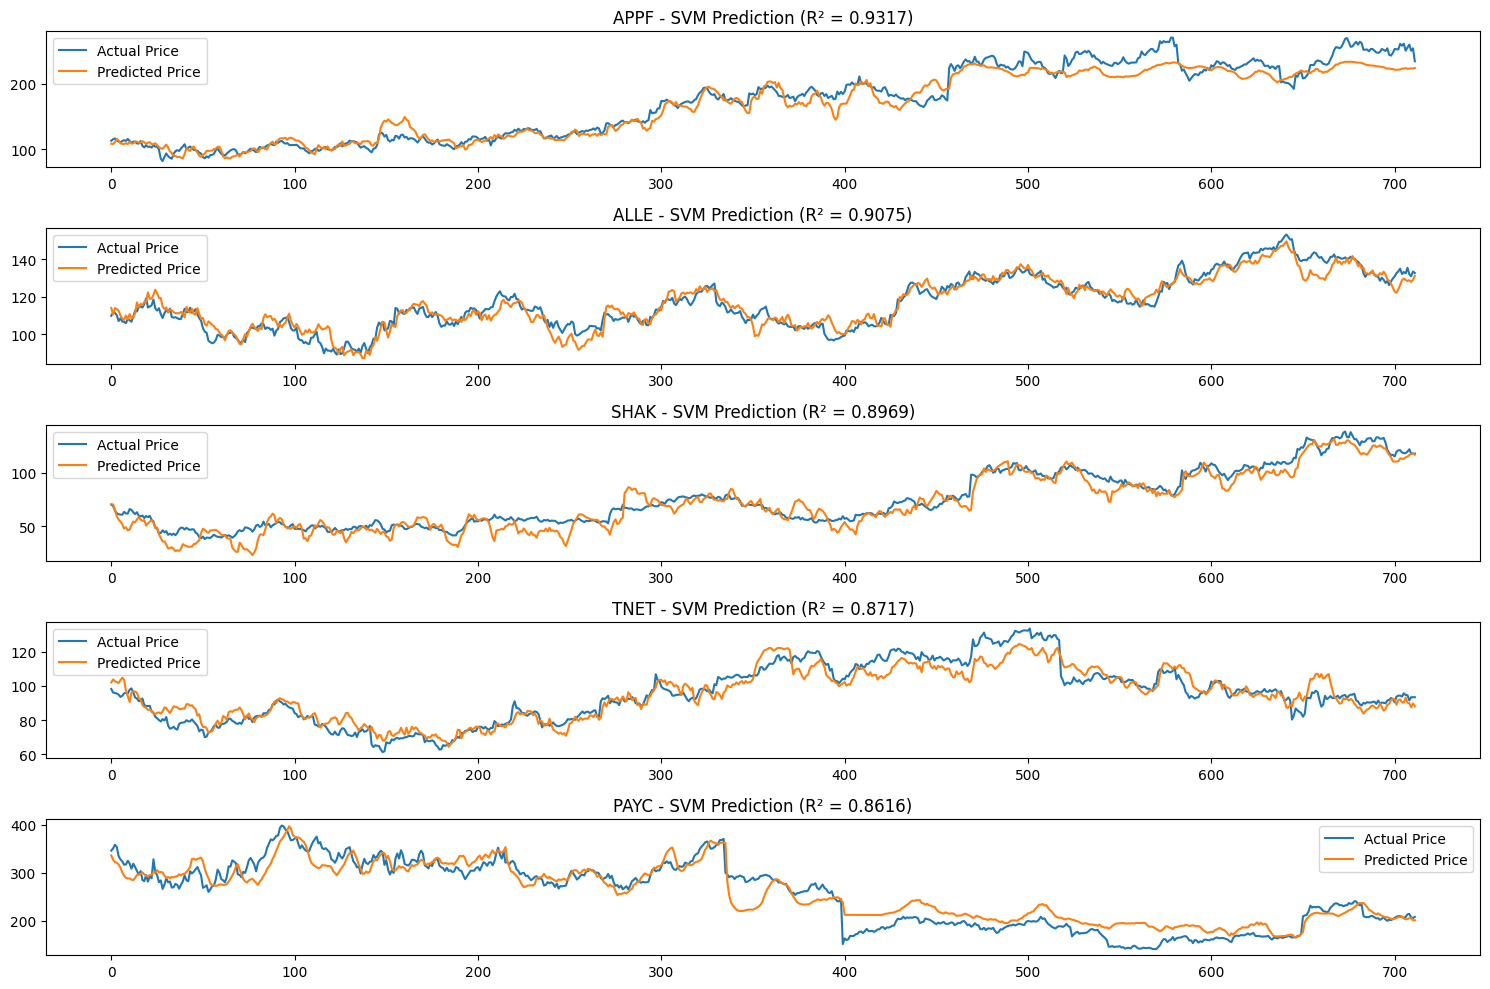

In [58]:
visualize_predictions(svm_results, 'SVM')

In [61]:
import xgboost as xgb

# Suppress warnings
warnings.filterwarnings('ignore', category=pd.errors.DtypeWarning)

# Read raw data
df_raw = pd.read_csv('merged_file.csv', header=None)

# Extract stock tickers
header_row = df_raw.iloc[0, 1:].tolist()
stock_names = []
for col in header_row:
    if isinstance(col, str) and ' US Equity' in col:
        base_name = col.split(' ')[0]
        if base_name not in stock_names:
            stock_names.append(base_name)

# Create price types and MultiIndex
price_types = ['High', 'Low', 'Open', 'Last_Price', 'Volume']
tuples = [(stock, price_type) for stock in stock_names for price_type in price_types]
multi_cols = pd.MultiIndex.from_tuples(tuples, names=['Stock', 'Metric'])

# Read CSV with headers
df = pd.read_csv('merged_file.csv', header=[0, 1])
date_column = df.iloc[:, 0]
df = df.drop(columns=[col for col in df.columns if 'Unnamed' in str(col)])

def create_technical_indicators(df, stock):
    df_stock = df[stock].copy()
    df_stock['SMA_20'] = df_stock['Last_Price'].rolling(window=20).mean()
    df_stock['EMA_12'] = df_stock['Last_Price'].ewm(span=12, adjust=False).mean()
    delta = df_stock['Last_Price'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
    rs = gain / loss
    df_stock['RSI'] = 100 - (100 / (1 + rs))
    exp1 = df_stock['Last_Price'].ewm(span=12, adjust=False).mean()
    exp2 = df_stock['Last_Price'].ewm(span=26, adjust=False).mean()
    df_stock['MACD'] = exp1 - exp2
    df_stock['MACD_Signal'] = df_stock['MACD'].ewm(span=9, adjust=False).mean()
    return df_stock

def prepare_stock_data(df, stock):
    df_stock = create_technical_indicators(df, stock)
    df_stock['Target'] = df_stock['Last_Price'].shift(-1)
    df_stock = df_stock.dropna()
    features = ['Last_Price', 'Volume', 'SMA_20', 'EMA_12', 'RSI', 'MACD', 'MACD_Signal']
    X = df_stock[features]
    y = df_stock['Target']
    return X, y

def train_xgboost_model(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = xgb.XGBRegressor(
        objective='reg:squarederror',
        n_estimators=100,
        learning_rate=0.1,
        max_depth=5,
        random_state=42
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return model, X_test, y_test, y_pred, mse, r2

def visualize_predictions(results, model_name):
    fig, axes = plt.subplots(3, 2, figsize=(15, 10))
    fig.suptitle(f'{model_name} Prediction Results', fontsize=16)
    
    for idx, (stock, (model, X_test, y_test, y_pred, mse, r2)) in enumerate(results.items()):
        if idx >= 6:  # Limit to 6 plots
            break
        row = idx // 2
        col = idx % 2
        ax = axes[row, col]
        ax.scatter(y_test, y_pred, alpha=0.5)
        ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
        ax.set_xlabel('Actual Price')
        ax.set_ylabel('Predicted Price')
        ax.set_title(f'{stock} (MSE: {mse:.4f}, R2: {r2:.4f})')
        ax.grid(True)
    
    # Remove empty subplots
    for i in range(len(results), 6):
        row = i // 2
        col = i % 2
        fig.delaxes(axes[row, col])
    
    plt.tight_layout()
    plt.savefig(f'{model_name}_predictions.png')
    plt.close()

In [62]:
selected_stocks = ['AAPL', 'NVDA', 'MSFT', 'AMZN', 'GOOGL', 'TSLA']
xgboost_results = {}

for stock in selected_stocks:
    try:
        X, y = prepare_stock_data(df, stock)
        model, X_test, y_test, y_pred, mse, r2 = train_xgboost_model(X, y)
        xgboost_results[stock] = (model, X_test, y_test, y_pred, mse, r2)
    except Exception as e:
        print(f"Error processing {stock}: {str(e)}")

visualize_predictions(xgboost_results, 'XGBoost')

Error processing AAPL: 'AAPL'
Error processing NVDA: 'NVDA'
Error processing MSFT: 'MSFT'
Error processing AMZN: 'AMZN'
Error processing GOOGL: 'GOOGL'
Error processing TSLA: 'TSLA'
